

# **Amazon Alexa Review - sentiment Analysis**



Analyzing the Amazon Alexa dataset and building classification models to predict if the sentiment of a given input sentence is positive or negative.

**Importing libraries**

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [249]:
# Load the TSV file
df = pd.read_csv(r"/content/amazon_alexa.tsv", sep='\t')
# Display the DataFrame
df


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [250]:
# cheak the null values
df.isna().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


There is one record with no 'verified_reviews' (null value)

In [251]:
# drop the null values

df.dropna(inplace=True)

In [252]:
# cheak the null values
df.isna().sum()

,0
rating,0
date,0
variation,0
verified_reviews,0
feedback,0


In [253]:
# cheak the shape of the dataframe
df.shape

(3149, 5)

In [ ]:
# Calculate the length of each verified review in the dataframe and store it in a new column called 'length'

df['length']=df['verified_reviews'].apply(len)


The 'length' column is new generated column - stores the length of 'verified_reviews' for that record. Let's check for some sample records

In [ ]:
# Display the first 5 rows of the DataFrame
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


**Data types of the features**

In [ ]:
# Get the data types of each column in the DataFrame
df.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64


* rating, feedback and length are integer values
* date, variation and verified_reviews are string values

**Analyzing 'rating column**

This column refers to the rating of the variation given by the user

In [ ]:
# Print the count of each rating value in the 'rating' column of the dataframe
print(f"Rating value count:\n{df['rating'].value_counts()}")

Rating value count:
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


In [ ]:
# Install the wordcloud library
%pip install wordcloud

**Let's plot the above values in bar graph**

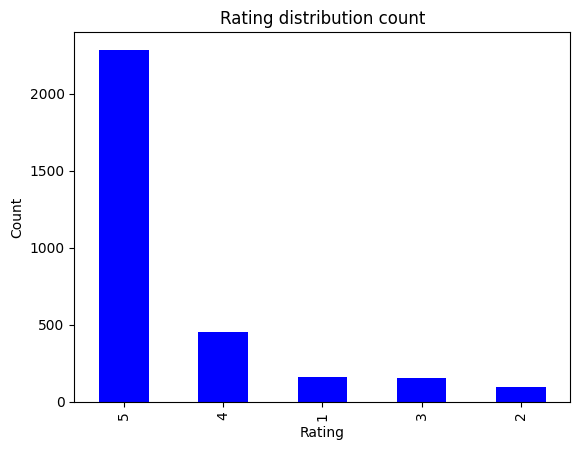

In [ ]:
# Plot the distribution of ratings in a bar chart
df['rating'].value_counts().plot.bar(color ='blue')
plt.title('Rating distribution count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Print the rating value count - percent distribution
# Round the value counts to 2 decimal places
print(f"Rating value count - percent distribution:\n{round(df['rating'].value_counts(normalize=True) * 100, 2)}")

Rating value count - percent distribution:
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: proportion, dtype: float64


**Let's plot the above values in a pie chart**

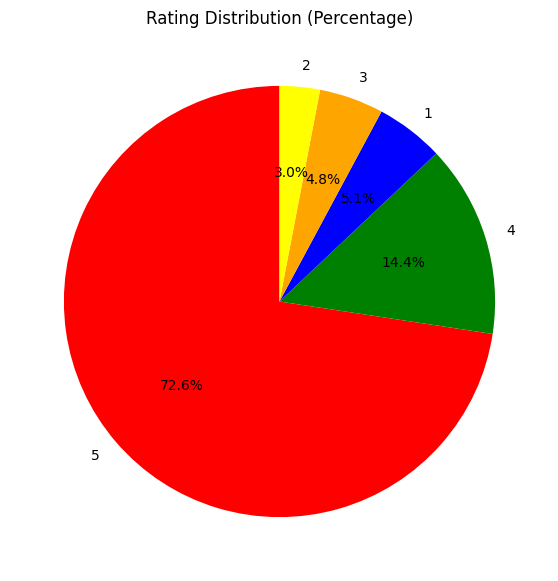

In [262]:
import matplotlib.pyplot as plt

# Calculate percentage distribution
tags = df['rating'].value_counts(normalize=True) * 100  # Convert to percentage

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    tags.values,  # Values to plot
    labels=tags.index,  # Labels for slices
    colors=['red', 'green', 'blue', 'orange', 'yellow'],  # Colors for the pie slices
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=90  # Rotate the start angle for better visuals
)

# Add title
plt.title('Rating Distribution (Percentage)')

# Show plot
plt.show()





**Analyzing 'feedback' column**

This column refers to the feedback of the verified review

In [ ]:
# Print the count of feedback values in the dataframe
print(f"Feedback value count: \n{df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.

**Let's pick the feedback value count in bar graph**


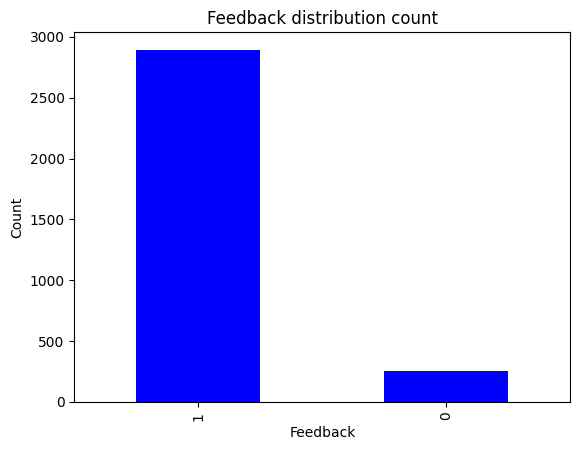

In [ ]:
# Plot the distribution of feedback counts
df['feedback'].value_counts().plot.bar(color ='blue') # Plot the bar chart of feedback counts with blue color
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
# Print the feedback value count - percentage distribution
# Round the value counts to 2 decimal places
print(f"Feedback value count - percentage distribution: \n{round(df['feedback'].value_counts(normalize=True) * 100, 2)}")


Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: proportion, dtype: float64


Feedback distribution

* 91.87% reviews are positive
* 8.13% reviews are negative

In [ ]:
# Count the number of occurrences of each rating value in the 'rating' column of the dataframe 'df' where the 'feedback' column is equal to 0

df[df['feedback']== 0]['rating'].value_counts()

,count
rating,
1,161
2,95


In [ ]:
# Count the number of occurrences of each rating value in the 'rating' column where the 'feedback' column is equal to 1

df[df['feedback'] == 1]['rating'].value_counts()


,count
rating,
5,2286
4,455
3,152


**Analyzing 'Variation' column**

This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [ ]:
# Print the variation value count
print(f"Variation value count: \n{df['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


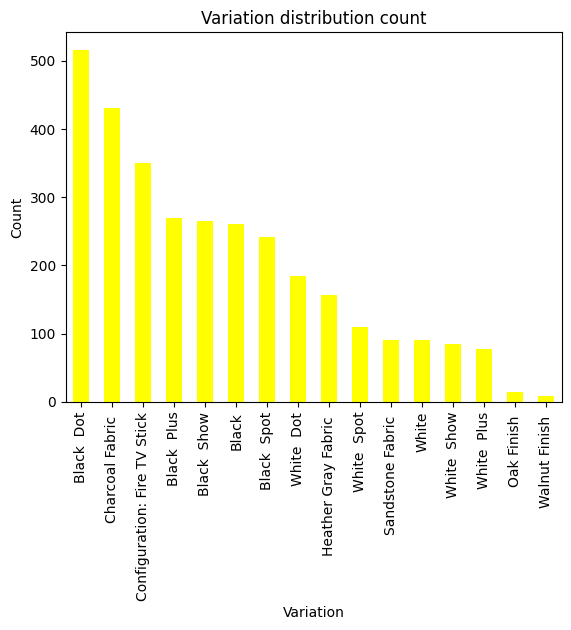

In [ ]:
# Plot the distribution of the 'variation' column in the dataframe as a bar chart
df['variation'].value_counts().plot.bar(color='yellow')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
# Print the variation value count - percentage distribution
# Round the value to 2 decimal places
print(f"Variation value count - percentage distribution:\n{round(df['variation'].value_counts(normalize=True) * 100, 2)}")


Variation value count - percentage distribution:
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: proportion, dtype: float64


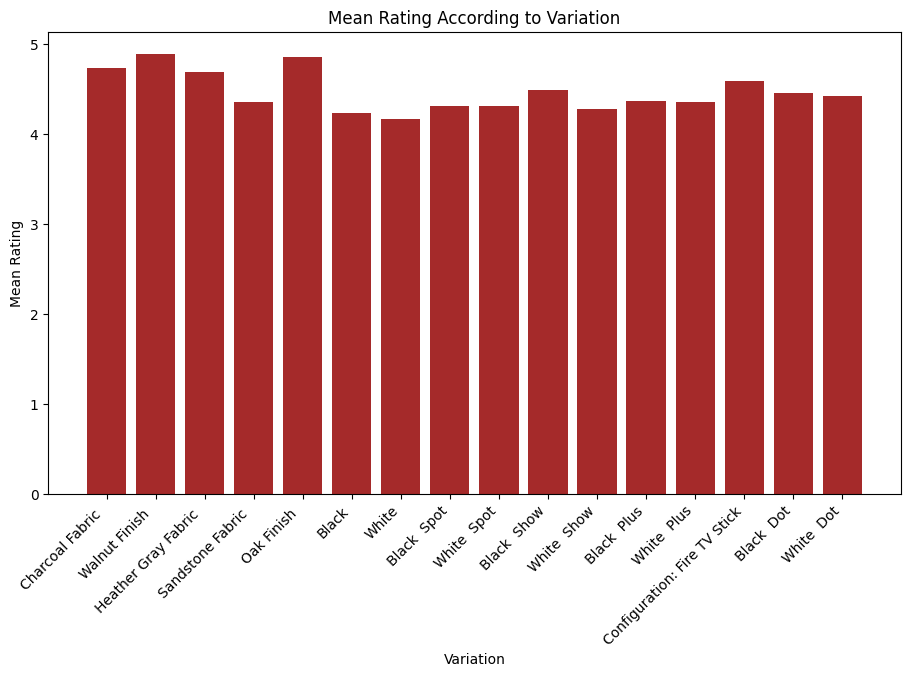

In [274]:
# Calculate the mean ratings for each unique variation without grouping
mean_ratings = df['variation'].unique()
mean_values = [df[df['variation'] == var]['rating'].mean() for var in mean_ratings]

# Create a bar plot
plt.figure(figsize=(11, 6))
plt.bar(mean_ratings, mean_values, color='brown')

# Add chart title and labels
plt.title("Mean Rating According to Variation")
plt.xlabel("Variation")
plt.ylabel("Mean Rating")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


**Analyzing 'verified_reviews' column**

This column contains the textual review given by the user for a variation for the product.

In [ ]:
# Calculate the descriptive statistics of the 'length' column in the dataframe
df['length'].describe()

,length
count,3149.000000
mean,132.090187
std,182.114569
min,1.000000
25%,30.000000
50%,74.000000
75%,165.000000
max,2851.000000


[Text(0.5, 1.0, 'Distribution of length of review')]

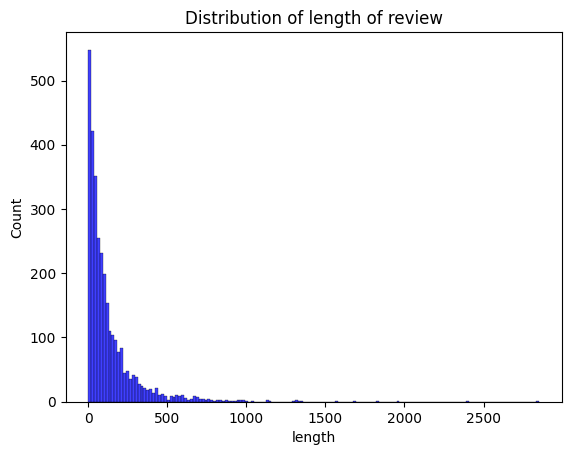

In [ ]:
# Import the seaborn library
import seaborn as sns
# Create a histogram plot of the 'length' column in the dataframe 'df' with a blue color
sns.histplot(df['length'],color = 'blue').set(title=("Distribution of length of review"))

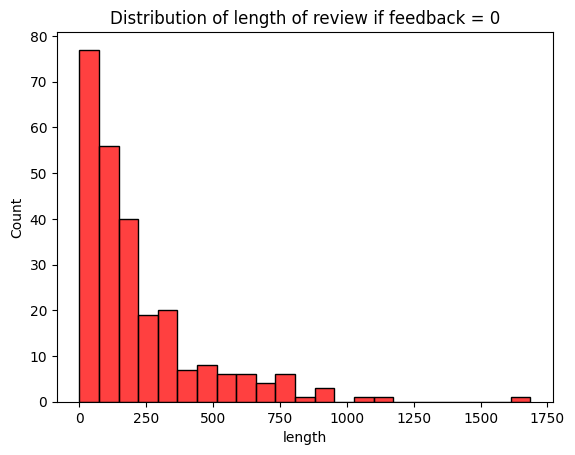

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a histogram of the length of reviews where feedback = 0
sns.histplot(
    df[df['feedback'] == 0]['length'],  # Data for feedback = 0
    color='red'
).set_title('Distribution of length of review if feedback = 0')

plt.show()


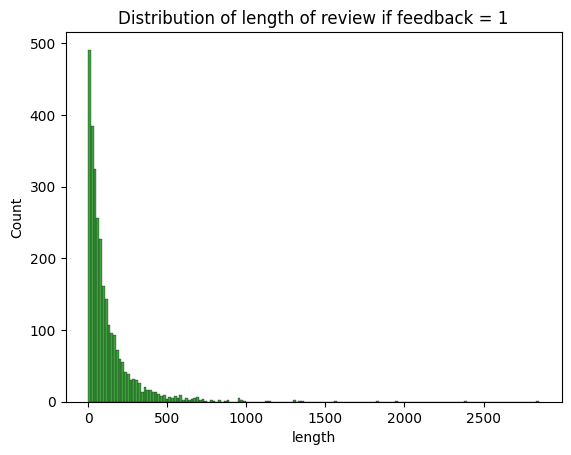

In [ ]:
# Plot a histogram of the length of reviews where feedback = 1
sns.histplot(
    df[df['feedback'] == 1]['length'],  # Data for feedback = 0
    color='green'
).set_title('Distribution of length of review if feedback = 1')

plt.show()

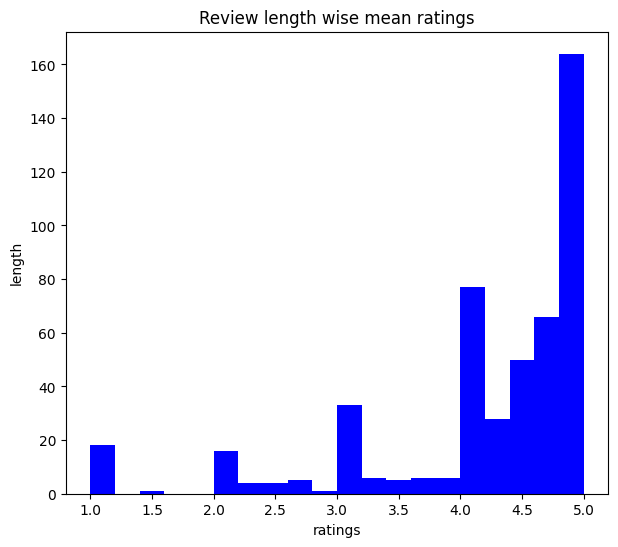

In [ ]:
# Group the dataframe by the 'length' column and calculate the mean of the 'rating' column
df.groupby('length')['rating'].mean().plot.hist(color ='blue',figsize=(7, 6),bins =20)
plt.title("Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel("length")
plt.show()

In [ ]:
# Import the CountVectorizer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words ='english')
words = cv.fit_transform(df.verified_reviews)

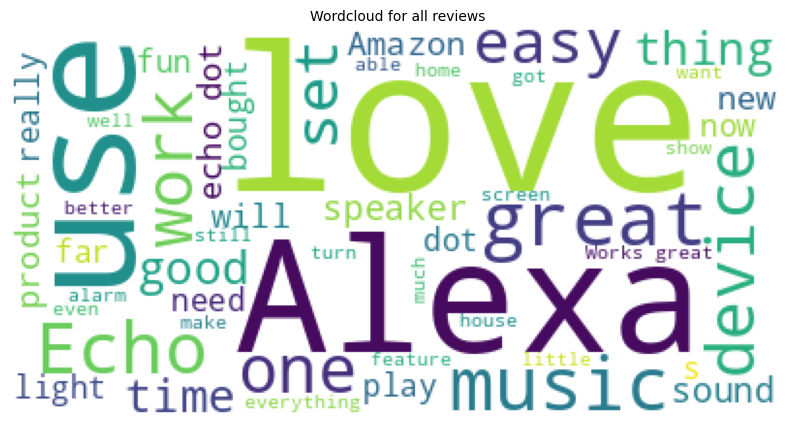

In [282]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one string
reviews = ' '.join(review for review in df['verified_reviews'])

# Initialize WordCloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(reviews))
plt.title("Wordcloud for all reviews", fontsize=10)
plt.axis('off')  # Hide axes
plt.show()


find the unique words in each feedback category

In [283]:

# Combine negative and positive reviews
neg_reviews = " ".join(df[df['feedback'] == 0]['verified_reviews'])
pos_reviews = " ".join(df[df['feedback'] == 1]['verified_reviews'])

# Split into words
neg_reviews_split = neg_reviews.split()
pos_reviews_split = pos_reviews.split()

# Extract unique words for negative reviews
unique_negative = [word for word in neg_reviews_split if word not in pos_reviews_split]
unique_negative = " ".join(unique_negative)

# Extract unique words for positive reviews
unique_positive = [word for word in pos_reviews_split if word not in neg_reviews_split]
unique_positive = " ".join(unique_positive)


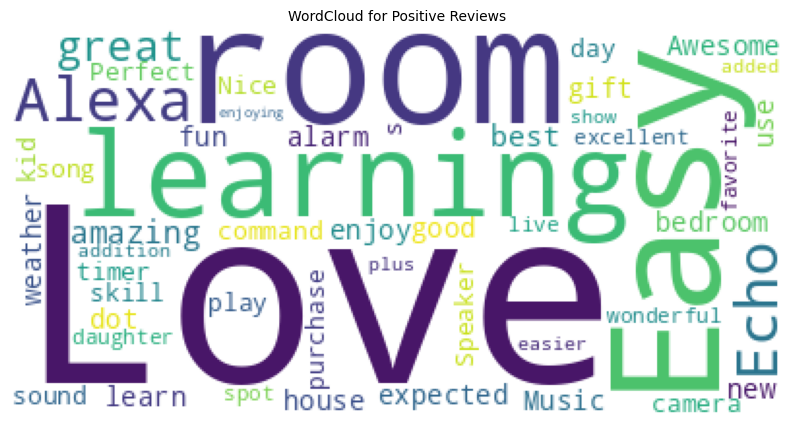

In [284]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize WordCloud object
wc = WordCloud(background_color="white", max_words=50)

# Create the WordCloud for positive reviews
plt.figure(figsize=(10, 10))
plt.imshow(wc.generate(unique_positive))
plt.title('WordCloud for Positive Reviews', fontsize=10)
plt.axis('off')  # Hide axes
plt.show()

 **preprocessing and modeling**

To build the corpus from the 'verified_reviews' we perform the following -

1. Replace any non alphabet characters with a space
2. Covert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [ ]:
# Import the stopwords from the NLTK library
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Create a set of English stopwords
STOPWORDS = set(stopwords.words('english'))

In [ ]:
# Import the necessary libraries
import re
from nltk.stem import PorterStemmer

corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

Using Count Vectorizer to create bag of words

In [288]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# Assuming `corpus` is the list of preprocessed text data (e.g., after stemming, removing stopwords)
# and `df['feedback']` contains the target variable (positive/negative feedback)

# Initialize CountVectorizer
cv = CountVectorizer(max_features=2500)

# Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()  # X contains the Bag of Words representation
y = df['feedback'].values  # y contains the feedback (target variable)

Using Count Vectorizer to create bag of words

In [289]:
import pickle

# Save the CountVectorizer object using pickle
pickle.dump(cv, open('/content/countVectorizer.pkl', 'wb'))

# Optionally, to verify the vectorizer was saved, you can load it back:
# cv_loaded = pickle.load(open('/content/countVectorizer.pkl', 'rb'))
# print(cv_loaded.get_feature_names_out())



save the model

In [ ]:
# Print the shape of the X variable
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


Checking the shape of X and y

**Data Splitting for Training and Testing**

In [ ]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [ ]:

# Print the maximum value of the X_train and X_test datasets
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


**Feature Scaling Using MinMaxScaler**

In [293]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [294]:
#Saving the scaler model
pickle.dump(scaler, open('/content/scaler.pkl', 'wb'))

**Random Forest**

In [295]:
from sklearn.ensemble import RandomForestClassifier

#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [296]:

#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9470899470899471


In [297]:

#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [298]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

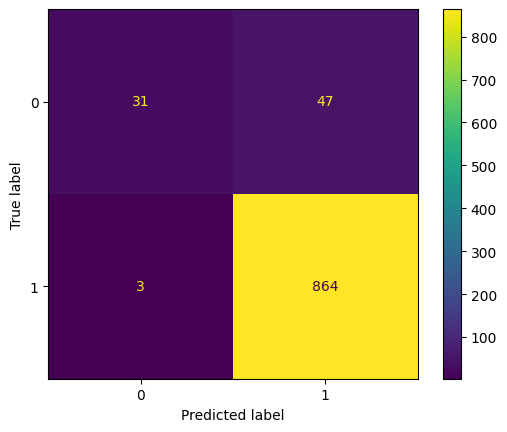

In [ ]:
# Import the ConfusionMatrixDisplay class from the sklearn.metrics module
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()


K fold cross-validation

In [ ]:
# Import the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9310345536816124
Standard Variance : 0.006671286833279426


In [ ]:
# Define the parameters for the Random Forest model
params = {  # Whether to use bootstrapping for creating the training samples
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [303]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
# Import the accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score

print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.83529945553539
Cross validation mean accuracy on test set : 92.17332123411978
Accuracy score for test set : 0.9470899470899471


**XgBoost**

In [ ]:
# Import the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [306]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


In [307]:

y_preds = model_xgb.predict(X_test)

In [308]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


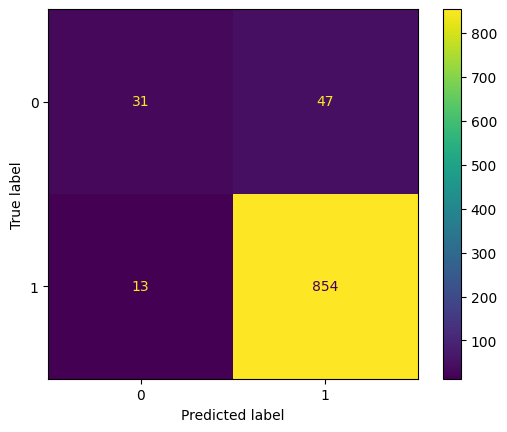

In [ ]:
# Display the confusion matrix
# Create a ConfusionMatrixDisplay object with the confusion matrix and the class labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [310]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('/content/model_xgb.pkl', 'wb'))


**Decision Tree Classifier**

In [ ]:
# Import the DecisionTreeClassifier from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [312]:

#Accuracy of the model on training and testing data

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9195767195767196


In [ ]:
# Predict the target variable for the test set using the decision tree model

y_preds = model_dt.predict(X_test)

In [314]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 39  39]
 [ 78 789]]


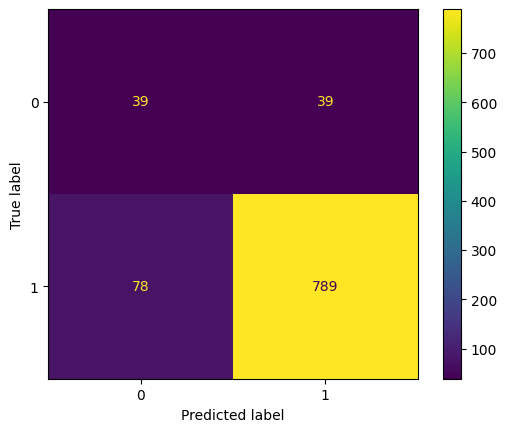

In [ ]:
# Display the confusion matrix
# Create a ConfusionMatrixDisplay object with the confusion matrix and the class labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()